In [1]:
#pip install yahooquery
#pip install prophet
import pandas as pd
from yahooquery import Ticker

In [2]:
#symbols = ['fb', 'aapl', 'amzn', 'nflx', 'goog', 'TSLA']
started = '2021-12-01'
stock_market = 'T'
symbols = [stock_market]
history_raw = Ticker(symbols).history(start=started, end='2022-12-31',adj_ohlc=False)
history_raw

open       high        low      close     volume  \
symbol date                                                                
T      2021-12-01  17.371601  17.522659  16.782476  16.790030  106323952   
       2021-12-02  16.827795  17.567976  16.827795  17.409367  105952835   
       2021-12-03  17.386707  17.771902  17.303625  17.719032   93399859   
       2021-12-06  17.817221  18.081572  17.545317  17.583082   78265347   
       2021-12-07  17.598186  17.651056  17.348944  17.432024   82646331   
...                      ...        ...        ...        ...        ...   
       2022-12-23  18.170000  18.320000  18.100000  18.309999   25164100   
       2022-12-27  18.250000  18.520000  18.219999  18.459999   30382500   
       2022-12-28  18.450001  18.549999  18.190001  18.219999   26632300   
       2022-12-29  18.270000  18.549999  18.240000  18.450001   23765900   
       2022-12-30  18.420000  18.480000  18.219999  18.410000   26200800   

                    adjclose  dividends  splits  
symbol date                                      
T      2021-12-01  15.403193        0.0     0.0  
       2021-12-02  15.971371        0.0     0.0  
       2021-12-03  16.255459        0.0     0.0  
       2021-12-06  16.130737        0.0     0.0  
       2021-12-07  15.992158        0.0     0.0  
...                      ...        ...     ...  
       2022-12-23  18.049366        0.0     0.0  
       2022-12-27  18.197231        0.0     0.0  
       2022-12-28  17.960648        0.0     0.0  
       2022-12-29  18.187374        0.0     0.0  
       2022-12-30  18.147943        0.0     0.0  

[273 rows x 8 columns]

In [3]:
history = history_raw.copy()

def rolling_column_std( df, column_name, days,exclude=True ):
    column_name_hist = "std_%s_%sd" % (column_name, days)
    df[column_name_hist] = df[column_name].rolling(days).std().round(2)
    if exclude:
        df.drop([column_name], axis='columns', inplace=True)

rolling_column_std(history,'open', 5, False)
rolling_column_std(history,'close', 5, False)
rolling_column_std(history,'volume', 5, False)
rolling_column_std(history,'high', 5, False)
rolling_column_std(history,'low', 5, False)

rolling_column_std(history,'open', 10, False)
rolling_column_std(history,'close', 10)
rolling_column_std(history,'volume', 10)
rolling_column_std(history,'high', 10, False)
rolling_column_std(history,'low', 10)

history.dropna(subset=['std_open_5d'], inplace=True)
history.dropna(subset=['std_open_10d'], inplace=True)
history.drop(['dividends','adjclose','splits'], axis='columns', inplace=True, errors='ignore')

history

open       high  std_open_5d  std_close_5d  \
symbol date                                                          
T      2021-12-14  16.910875  17.167673         0.21          0.27   
       2021-12-15  16.827795  16.918428         0.26          0.26   
       2021-12-16  17.107250  18.043806         0.21          0.47   
       2021-12-17  17.975830  18.006042         0.46          0.60   
       2021-12-20  18.149548  18.345921         0.62          0.70   
...                      ...        ...          ...           ...   
       2022-12-23  18.170000  18.320000         0.17          0.18   
       2022-12-27  18.250000  18.520000         0.16          0.15   
       2022-12-28  18.450001  18.549999         0.16          0.12   
       2022-12-29  18.270000  18.549999         0.16          0.11   
       2022-12-30  18.420000  18.480000         0.12          0.10   

                   std_volume_5d  std_high_5d  std_low_5d  std_open_10d  \
symbol date                                                               
T      2021-12-14    19608885.02         0.25        0.24          0.29   
       2021-12-15    20024385.37         0.21        0.23          0.33   
       2021-12-16    35071495.01         0.42        0.23          0.30   
       2021-12-17    29157835.58         0.52        0.37          0.37   
       2021-12-20    26279629.14         0.62        0.54          0.43   
...                          ...          ...         ...           ...   
       2022-12-23    13895647.17         0.10        0.19          0.53   
       2022-12-27     7241690.72         0.15        0.15          0.48   
       2022-12-28     6769230.78         0.14        0.12          0.34   
       2022-12-29     3687825.61         0.13        0.13          0.22   
       2022-12-30     2470609.33         0.10        0.06          0.18   

                   std_close_10d  std_volume_10d  std_high_10d  std_low_10d  
symbol date                                                                  
T      2021-12-14           0.32     18344355.21          0.28         0.28  
       2021-12-15           0.33     17041316.67          0.35         0.30  
       2021-12-16           0.38     26745216.66          0.39         0.29  
       2021-12-17           0.42     32024755.60          0.41         0.32  
       2021-12-20           0.51     31742795.09          0.45         0.39  
...                          ...             ...           ...          ...  
       2022-12-23           0.47     15370231.69          0.50         0.51  
       2022-12-27           0.38     15471215.09          0.44         0.43  
       2022-12-28           0.28     16201772.04          0.30         0.31  
       2022-12-29           0.21     17262933.65          0.20         0.22  
       2022-12-30           0.20     17662251.38          0.16         0.20  

[264 rows x 12 columns]

In [4]:
from prophet import Prophet

history_goog = history.reset_index()
#history['date'] = pd.to_datetime(history['date'])
#history.sort_values(by=['symbol','date'], inplace = True)
history_goog = history_goog[ history_goog['symbol'] == stock_market ]

history_goog.rename({"date": "ds"}, inplace=True, axis=1)
history_goog.rename({"open": "y"}, inplace=True, axis=1)

print('completed')

completed


In [5]:
history_raw_goog = Ticker(symbols).history(start=started, end='2023-01-20',adj_ohlc=False)
history_raw_goog = history_raw_goog.reset_index()
print('completed')

completed


In [6]:
history_raw_goog_cp = history_raw_goog.copy()

history_raw_goog_cp['date'] = pd.to_datetime(history_raw_goog_cp['date'])
history_raw_goog_cp.sort_values(by=['date'], inplace = True)

rolling_column_std(history_raw_goog_cp,'open', 5, False)
rolling_column_std(history_raw_goog_cp,'close', 5, False)
rolling_column_std(history_raw_goog_cp,'volume', 5, False)
rolling_column_std(history_raw_goog_cp,'high', 5, False)
rolling_column_std(history_raw_goog_cp,'low', 5, False)

rolling_column_std(history_raw_goog_cp,'open', 10, False)
rolling_column_std(history_raw_goog_cp,'close', 10)
rolling_column_std(history_raw_goog_cp,'volume', 10)
rolling_column_std(history_raw_goog_cp,'high', 10, False)
rolling_column_std(history_raw_goog_cp,'low', 10)

history_raw_goog_cp.dropna(subset=['std_open_5d','std_open_10d'], inplace=True)
#history_raw_goog_cp.drop(['adjclose'], axis='columns', inplace=True)
print('completed')

completed


In [7]:
history_raw_goog_cp.sample(5)

,symbol,date,open,high,adjclose,dividends,splits,std_open_5d,std_close_5d,std_volume_5d,std_high_5d,std_low_5d,std_open_10d,std_close_10d,std_volume_10d,std_high_10d,std_low_10d
242,T,2022-11-16,19.000000,19.049999,18.660542,0.000,0.0,0.14,0.09,8533189.34,0.19,0.16,0.35,0.35,5914005.74,0.39,0.35
92,T,2022-04-13,19.120001,19.490000,18.562250,0.278,0.0,0.77,0.81,40117023.33,0.90,0.77,0.64,0.72,34636879.97,0.78,0.66
192,T,2022-09-07,16.760000,17.139999,16.339653,0.000,0.0,0.41,0.35,11647928.03,0.31,0.37,0.42,0.46,11844260.42,0.35,0.45
29,T,2022-01-12,19.848944,20.022659,18.823584,0.000,0.0,0.24,0.11,21319990.03,0.09,0.14,0.60,0.52,23638752.92,0.58,0.50
103,T,2022-04-29,19.360001,19.370001,18.026983,0.000,0.0,0.22,0.27,8416341.28,0.22,0.18,0.25,0.35,10383257.17,0.31,0.24


In [8]:
import itertools
import numpy as np
import pandas as pd
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

history_raw_goog_cp.rename({"date": "ds"}, inplace=True, axis=1)
history_raw_goog_cp.rename({"open": "y"}, inplace=True, axis=1)
history_goog.rename({"high": "cap"}, inplace=True, axis=1)

param_grid = {
    'growth': ['linear', 'logistic', 'flat'],
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.1, 1.0, 5.0],
}

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
results = []

import logging
logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

result = {}
result['rmse'] = [100]
win_m = None
win_params = None

for params in all_params:
    m = Prophet(**params)
    m.add_regressor('std_open_5d')
    m.add_regressor('std_close_5d')
    m.add_regressor('std_volume_5d')
    m.add_regressor('std_high_5d')
    m.add_regressor('std_low_5d')

    m.add_regressor('std_open_10d')
    m.add_regressor('std_close_10d')
    m.add_regressor('std_volume_10d')
    m.add_regressor('std_high_10d')
    m.add_regressor('std_low_10d')
    
    m.fit(history_goog)    
    df_cv = cross_validation(m, horizon = '30 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    
    if df_p['rmse'][0] < result['rmse'][0]:
        result = df_p
        win_m = m
        win_params = params
        print(df_p)

print('completed')

  0%|          | 0/18 [00:00<?, ?it/s]

Optimization terminated abnormally. Falling back to Newton.


  horizon       mse      rmse       mae     mape     mdape     smape  coverage
0 30 days  4.859029  2.204321  1.898922  0.10423  0.103463  0.104553  0.293333


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Optimization terminated abnormally. Falling back to Newton.


  0%|          | 0/18 [00:00<?, ?it/s]

  horizon       mse      rmse       mae      mape     mdape     smape  \
0 30 days  3.424875  1.850642  1.297929  0.069584  0.045215  0.072615   

   coverage  
0      0.44  


  0%|          | 0/18 [00:00<?, ?it/s]

Optimization terminated abnormally. Falling back to Newton.


  horizon       mse      rmse       mae      mape     mdape     smape  \
0 30 days  3.416318  1.848328  1.295064  0.069445  0.045009  0.072454   

   coverage  
0  0.450667  


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Optimization terminated abnormally. Falling back to Newton.


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  horizon       mse      rmse       mae      mape     mdape     smape  \
0 30 days  0.027607  0.166153  0.127954  0.006933  0.005466  0.006917   

   coverage  
0  0.818667  


  0%|          | 0/18 [00:00<?, ?it/s]

Optimization terminated abnormally. Falling back to Newton.


  horizon       mse      rmse       mae      mape     mdape     smape  \
0 30 days  0.025936  0.161048  0.124407  0.006739  0.005404  0.006723   

   coverage  
0  0.813333  


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Optimization terminated abnormally. Falling back to Newton.


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Optimization terminated abnormally. Falling back to Newton.


  0%|          | 0/18 [00:00<?, ?it/s]

Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Optimization terminated abnormally. Falling back to Newton.


completed


Text(91.97222222222221, 0.5, 'Preço abertura')

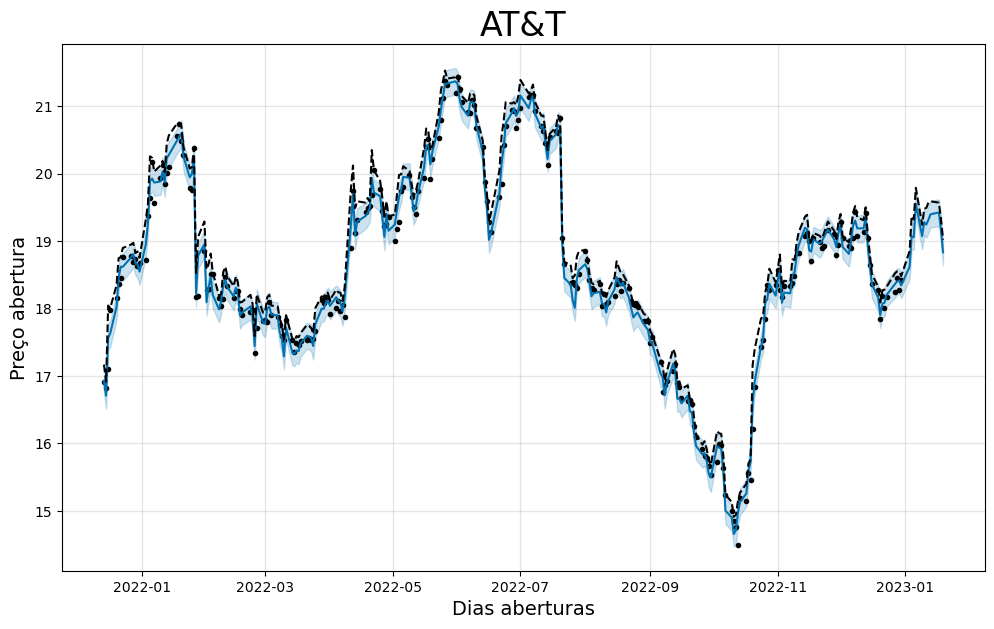

In [9]:
history_raw_goog_cp.rename({"high": "cap"}, inplace=True, axis=1)
forecast = win_m.predict(history_raw_goog_cp)

fig1 = win_m.plot(forecast)

ax = fig1.gca()
#fig1.set_figwidth(40)
#fig1.set_figheight(10)
ax.set_title("AT&T", size=24)
ax.set_xlabel("Dias aberturas", size=14)
ax.set_ylabel("Preço abertura", size=14)

In [10]:
result

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,30 days,0.025936,0.161048,0.124407,0.006739,0.005404,0.006723,0.813333


In [11]:
win_params

{'growth': 'logistic',
 'changepoint_prior_scale': 0.01,
 'seasonality_prior_scale': 1.0}